# Семинар 3: Постановка задачи Обучения по прецедентам

## Организационное

1. Страница курса 
  - Ссылки на материалы по предыдущим семинарам
    - Минимальные сведения про Python
    - Бибилиотека работы с данными Pandas
    - Работа с числовыми массивами, векторами и матрицами: NumPy
  - Резюме к семинарам
2. Виртуальная машина для работы на семинарах
  - [`shad.people.yandex.net`](https://shad.people.yandex.net/tree)
  - Предупреждение браузера о "незащищенном соединении" — игнорировать
  - Сервер все еще держится на честном слове, убедительная просьба:
    - Выключать свои интерактивные тетрадки по окончанию работы (освобождать оперативную память на сервере)
    - Загружать тетрадки и всю важную для вас информацию с сервера
    - Не хулиганить
2. Лабораторная работа 1: Работа с данными в Python
  - Дедлайн: 09.02.2016 09:00 MSK
  - Ответы на вопросы по заявкам слушателей: 
    - Соорганизоваться, собрать вопросы в общий список
    - На следующем семинаре разберем то что непонятно

## Понятия из лекции

- Обучение с учителем (Supervised Learning) — одна из задач Машинного обучения [[ML.ru]](http://www.machinelearning.ru/wiki/index.php?title=Обучение_с_учителем), [[Wiki]](https://en.wikipedia.org/wiki/Supervised_learning)

Для того чтобы поставить задачу обучения с учителем, необходимо определиться со следующим:
1. Объект
2. Целевая переменная
  - классификация
  - регрессия
3. Обучающая выборка
4. Функционал качества предсказания
5. Признаки объекта

## Пример 1. Отклик клиента на предложение

## Пример 2. Диагностика заболевания

## Пример 3. Прогноз з/п на рынке труда

##### Ситуация
  - Требуется сделать инструмент для аудитории веб-сервиса поиска работы (например [HH.ru](http://hh.ru/))
    - Работодатели по описанию вакансии получают оценку желаемой з/п на рынке труда
    - Соискатели по резюме получают оценку предлагаемой з/п
  - Имеются данные: журнал принятых офферов (дата, описание вакансии, резюме, з/п)
  

#####  Задачи машинного обучения
  1. Прогноз нижней границы з/п по описанию вакансии
    - Объекты: принятые офферы
    - Целевая переменная: з/п
    - Признаки: текст описания вакансии, категории, дата (год, месяц в году), город, ...
    - Обучающая выборка: записи из журнала офферов
    - Функционал качества: квантильная функция потерь: 
      - $L(y, \hat{y}) = \tau (y - \hat{y}) I[y \geq \hat{y}] + (1 - \tau) (\hat{y} - y) I[y \leq \hat{y}]$
      - $\tau = 0.1 \, (10\%)$
      - интерпретация: для объектов с одинаковыми признаками (одинаковыми вакансиями), минимум $\hat{y}$ достигается в точке, ниже которой — 10% вакансий, выше — 90% вакансий
  2. Прогноз верхней границы з/п
    - Все то же самое
    - Функционал качества:
      - $\tau = 0.9 \, (90\%)$
  3. Прогноз нижней и верхней границ з/п соискателя по резюме
     
##### Похожие задачи
  - Прогноз стоимости недвижимости на [ЦИАН](http://www.cian.ru/)
  - Прогноз стоимости авиабилетов [AviaSales](http://www.aviasales.ru/)

## Самостоятельная работа

1. Придумайте ситуацию в которой методы обучения с учителем могут принести пользу
2. Сформулируйте одну или несколько задач обучения с учителем
3. Запишите в тетрадку ситуацию, задачу и ее сведение к задаче обучения с учителем 
4. Демонстрация у доски

Крайне желательно взять задачу из той области, на которой вы специализируетесь в университете: логистика, экономика, финансы, управление и т.д. Еще лучше, если задача, которую вы сформулируете, будет непосредственно связана с вашей курсовой/дипломной работой. 

## Демонстрация: машинное обучение как черный ящик

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### Задача

- Научиться предсказывать качество вина по физическим/химическим характеристикам
- Имеются данные: пробы вина с экспертными оценками в шкале от 1 до 10
- Набор данных открытый: [UCI Wine Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

##### Прочитаем набор данных

In [2]:
import pandas

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data_wine_quality = pandas.read_csv(dataset_url, sep=';')

In [3]:
data_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


- Объект — проба вина, строчка в таблице
- Последняя колонка `quality` — целевая переменная
- Остальные колонки — значения признаков объектов

##### Частота значений целевой переменной

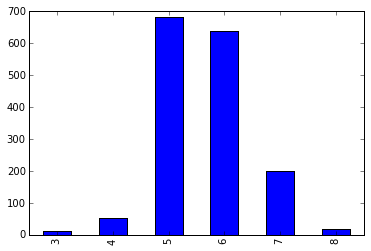

In [4]:
data_wine_quality['quality'].value_counts().sort_index().plot(kind='bar')

##### Матрица объект-признак

In [5]:
X = data_wine_quality.ix[:, :11].values

##### Вектор правильных ответов

In [6]:
y = data_wine_quality.ix[:, 'quality'].values

##### Обучаем (*to fit*) прогнозирующую модель

In [7]:
from sklearn.ensemble import RandomForestRegressor

wine_quality_predictor = RandomForestRegressor()
wine_quality_predictor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

##### Теперь можем предсказывать качество вина, имея только значения признаков

Возьмем, например, первую пробу и попросим у модели прогноз

In [8]:
data_wine_quality.ix[1, :-1].values

array([  7.8   ,   0.88  ,   0.    ,   2.6   ,   0.098 ,  25.    ,
        67.    ,   0.9968,   3.2   ,   0.68  ,   9.8   ])

In [9]:
wine_quality_predictor.predict([
        [  7.8,   0.88,   0.,   2.6,   0.098,  25.,  67.,   0.9968,  3.2,   0.68,   9.8   ],
    ])

array([ 5.])

##### Добавим алкоголя, посмотрим как изменится прогноз экспертной оценки

In [10]:
wine_quality_predictor.predict([
        [  7.8,   0.88,   0.,   2.6,   0.098,  25.,  67.,   0.9968,  3.2,   0.68,   20   ],
    ])

array([ 6.2])

## На следующем семинаре

- (!) Вопросы по Лабораторной работе 1
- Первое семейство алгоритмов обучения с учителем
- Оценка качества работы алгоритма обучения с учителем, обобщающая способность